In [8]:
# cribbed from here: https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/
# and here: https://www.learndatasci.com/tutorials/data-science-statistics-using-python/

# pip3 install jupyter pandas matplotlib seaborn

# show them that cells can see each other's data, but they won't auto refresh 
# after reloading page, need to run them all again to get the env (vars) you expect

# first import pandas 
import pandas as pd        # don't bother with alias

In [9]:
# create an example data table to work with
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}

# Series: a column, i.e. different values/samples for the same (but can also be a row, i.e. any 1D cross-section?)
# DataFrame: a list of Series, i.e. a 2D table of data


In [10]:
# pass our data table into pandas to be loaded as a DataFrane
purchases = pd.DataFrame(data)
purchases  # notice the nice table in the output!

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


In [11]:
# We can access a single row using .loc()
purchases = pd.DataFrame(data)  # reload the data (in case other cells have been run in-between, and changed it!)
purchases.loc[2]

apples     0
oranges    7
Name: 2, dtype: int64

In [12]:
# We can get a list of column names:
print( purchases.columns )

# And we can access a Series (column) like this:
purchases['oranges']

# or as an attribute:
# purchases.oranges

Index(['apples', 'oranges'], dtype='object')


0    0
1    3
2    7
3    2
Name: oranges, dtype: int64

In [109]:
# Or if you just want the raw values as a list (actually a NumPy array, but close enough):
purchases['oranges'].values
#for val in purchases['oranges'].values: print(val)

array([0, 3, 7, 2])

In [14]:
# You can start doing statistical calculations on Series:
purchases['oranges'].mean()

3.0

In [15]:
# Notice the indexed rows on the far left! This happened automatically
# ...but we can define our own row indices when we create this DataFrame:
purchases = pd.DataFrame(data, index=['June', 'Robert', 'Lily', 'David'])
purchases

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


In [16]:
# To find a single row, we can index by the customer name now:
purchases.loc['June']

apples     3
oranges    0
Name: June, dtype: int64

___
## So far so good!
But what about loading real-world data from a file?

(Database loading examples????)
___

In [17]:
# URL: https://raw.githubusercontent.com/LearnDataSci/article-resources/master/Python%20Pandas%20Tutorial%20A%20Complete%20Introduction%20for%20Beginners/IMDB-Movie-Data.csv
# curl https://raw.githubusercontent.com/LearnDataSci/article-resources/master/Python%20Pandas%20Tutorial%20A%20Complete%20Introduction%20for%20Beginners/IMDB-Movie-Data.csv >movies.csv

movies = pd.read_csv("movies.csv", index_col="Title")  # Tell it which field to make the index
movies


,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
The Great Wall,6,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
La La Land,7,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
Mindhorn,8,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
The Lost City of Z,9,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0


In [18]:
# Notice it shows us a formatted table with only the first 30 and last 30 rows
# To see just the top 5:
movies.head()  # defaults to 5, can give arg


,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [19]:
# The last 5:
movies.tail()

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Secret in Their Eyes,996,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
Search Party,999,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
Nine Lives,1000,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [20]:
# To get a summary about the dataframe we just loaded:
# (look out for null values!)
movies.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
Rank                  1000 non-null int64
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


In [21]:
# A shorter version of the above, just giving the rows and columns:
movies.shape

(1000, 11)

In [22]:
# append example?
temp_movies = movies.append( movies )  # the pandas .append() is non-destructive, doesn't change 'movies'... unless inplace=True
print( temp_movies.shape )
temp_movies = temp_movies.drop_duplicates()  # inplace=True i.e. destructive
print( temp_movies.shape )

(2000, 11)
(1000, 11)


## Cleaning up our data

In [23]:
# Let's clean up those column names
movies.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [24]:
# Rename the weird ones!
movies.rename(columns={
        'Runtime (Minutes)': 'Runtime', 
        'Revenue (Millions)': 'Revenue_millions'
    }, inplace=True)

# check the result
movies.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

In [25]:
# or just give an entire new list of column names at once:
movies.columns = ['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime', 'rating', 'votes', 'revenue_millions', 'metascore']


movies.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

In [26]:
# List comprehension would be even faster:
movies.columns = [col.lower() for col in movies]
movies.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

## Dealing with missing values

In [27]:
# Find the rows with null values.... this returns a new DataFrame
movies.isnull()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,False,False,False,False,False,False,False,False,False,False,False
Prometheus,False,False,False,False,False,False,False,False,False,False,False
Split,False,False,False,False,False,False,False,False,False,False,False
Sing,False,False,False,False,False,False,False,False,False,False,False
Suicide Squad,False,False,False,False,False,False,False,False,False,False,False
The Great Wall,False,False,False,False,False,False,False,False,False,False,False
La La Land,False,False,False,False,False,False,False,False,False,False,False
Mindhorn,False,False,False,False,False,False,False,False,False,True,False
The Lost City of Z,False,False,False,False,False,False,False,False,False,False,False


In [28]:
# Useful but a bit verbose... let's use an 'aggregate' function to find out which columns have the null values:
movies.isnull().sum()

rank                  0
genre                 0
description           0
director              0
actors                0
year                  0
runtime               0
rating                0
votes                 0
revenue_millions    128
metascore            64
dtype: int64

In [29]:
# Ok, they're in the reveunue and metascore columns only!
# But how to fill them in? We might not want to remove those rows completely, because there's still
# useful data in other fields that we might want to keep.
# We can "impute" the values for these fields, i.e. replace them with the average for that column:
revenue_mean = movies['revenue_millions'].mean()
revenue_mean

82.956376146788983

In [30]:
# Use fillna() to replace these values
movies['revenue_millions'].fillna(revenue_mean, inplace=True)
# Check that it worked:
movies.isnull().sum()

rank                 0
genre                0
description          0
director             0
actors               0
year                 0
runtime              0
rating               0
votes                0
revenue_millions     0
metascore           64
dtype: int64

In [31]:
# ^ We could use a similar process for the nulls in 'metascore'

# In practice you might want to be a bit more refined about your imputation,
# i.e. replace with the mean value for the same genre of movie....
    

## Analysis of the data
Understanding the variables

In [32]:
# Use .describe() to get a statistical summary of the numerical columns
movies.describe()



,rank,year,runtime,rating,votes,revenue_millions,metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,96.412043,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,60.375000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [33]:
# Standard Deviation: a measure of how "spread out" a bunch of numbers are;
# the average of the distances of each value from the mean


# 25% (percentile): 25% of values are below this number
# 75% (percentile): 75% of values are below than this number
# In general, these are 'quartiles', split the data into four groups

In [170]:
# We can also use .describe() on a single column (Series):

movies['genre'].describe() # this gives us less info because it's a category, not a 'continuous' (numeric) value

movies['rating'].describe()

# We will use graphs later on to make this data more understandable!

count                        1000
unique                        207
top       Action,Adventure,Sci-Fi
freq                           50
Name: genre, dtype: object

In [35]:
# ^ Freq is how often the most common value shows up

# .value_counts tells us the frequency of all values in a column
movies['genre'].value_counts().head(20)

Action,Adventure,Sci-Fi       50
Drama                         48
Comedy,Drama,Romance          35
Comedy                        32
Drama,Romance                 31
Action,Adventure,Fantasy      27
Animation,Adventure,Comedy    27
Comedy,Drama                  27
Comedy,Romance                26
Crime,Drama,Thriller          24
Crime,Drama,Mystery           23
Action,Adventure,Drama        18
Action,Crime,Drama            17
Horror,Thriller               16
Drama,Thriller                15
Biography,Drama,History       14
Adventure,Family,Fantasy      14
Biography,Drama               14
Action,Adventure,Comedy       14
Action,Crime,Thriller         12
Name: genre, dtype: int64

## Relationships between variables

In [36]:
# We can find "correlations" between each pair of numerical columns ("bivariate relationship") in the data:
# Positive numbers mean a positive correlation: as one number goes up, so does the other, in proportion to the number
# Negative numbers mean the opposite: as one number goes up, the other goes down
movies.corr()

,rank,year,runtime,rating,votes,revenue_millions,metascore
rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.252996,-0.191869
year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.117562,-0.079305
runtime,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.247834,0.211978
rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.189527,0.631897
votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.607941,0.325684
revenue_millions,-0.252996,-0.117562,0.247834,0.189527,0.607941,1.000000,0.133328
metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.133328,1.000000


In [37]:
# ^ Wouldn't it be nice to see the larger values here highlighted somehow.......

# (graphing)


## Slicing and dicing the data

In [38]:
# Reminder: if you ask for just one column, you get a Series variable back:
type( movies['genre'] )

pandas.core.series.Series

In [39]:
# If you ask for multiple columns using a list, you will get a DataFrame 
# (which is what our entire movies data table is)
subset = movies[ ['genre', 'rating'] ] 
print( type(subset) )
subset.head()

<class 'pandas.core.frame.DataFrame'>


,genre,rating
Title,,
Guardians of the Galaxy,"Action,Adventure,Sci-Fi",8.1
Prometheus,"Adventure,Mystery,Sci-Fi",7.0
Split,"Horror,Thriller",7.3
Sing,"Animation,Comedy,Family",7.2
Suicide Squad,"Action,Adventure,Fantasy",6.2


In [40]:
# Remember how to get a single row? Use .loc[INDEX] or .iloc[INTEGER]
movies.loc['Prometheus']

rank                                                                2
genre                                        Adventure,Mystery,Sci-Fi
description         Following clues to the origin of mankind, a te...
director                                                 Ridley Scott
actors              Noomi Rapace, Logan Marshall-Green, Michael Fa...
year                                                             2012
runtime                                                           124
rating                                                              7
votes                                                          485820
revenue_millions                                               126.46
metascore                                                          65
Name: Prometheus, dtype: object

In [41]:
movies.iloc[1]

rank                                                                2
genre                                        Adventure,Mystery,Sci-Fi
description         Following clues to the origin of mankind, a te...
director                                                 Ridley Scott
actors              Noomi Rapace, Logan Marshall-Green, Michael Fa...
year                                                             2012
runtime                                                           124
rating                                                              7
votes                                                          485820
revenue_millions                                               126.46
metascore                                                          65
Name: Prometheus, dtype: object

In [42]:
# You can use Python's list slice syntax to get multiple rows:
# You could also use movies.loc['Prometheus':'Sing']
movies.iloc[1:5]

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [43]:
# Grouping
# movies.groupby('director').count()
# movies.groupby(['director', 'Title']).count()
# movies.groupby('director').get_group('Adam McKay')['year'].tolist()

# movies.groupby('director').apply(lambda x: x['year'])

# movies.groupby('director').director.count().sort_values(ascending=False)

# movies.director.values

In [44]:
# Conditional selection
movies['director'] == "Ridley Scott"



Title
Guardians of the Galaxy                    False
Prometheus                                  True
Split                                      False
Sing                                       False
Suicide Squad                              False
The Great Wall                             False
La La Land                                 False
Mindhorn                                   False
The Lost City of Z                         False
Passengers                                 False
Fantastic Beasts and Where to Find Them    False
Hidden Figures                             False
Rogue One                                  False
Moana                                      False
Colossal                                   False
The Secret Life of Pets                    False
Hacksaw Ridge                              False
Jason Bourne                               False
Lion                                       False
Arrival                                    False
Gold          

In [45]:
# ^ That just gets us a True/False list for each row, the result of the condition
# To actually get only the films directed by Ridley Scott, we need to use this condition to access the dataframe:

movies[ movies['director'] == 'Ridley Scott' ]

# In other words, select all rows from movies where the the director for the row is Ridley Scott

# then we could .describe() just these movies


,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0
Exodus: Gods and Kings,517,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0
The Counselor,522,"Crime,Drama,Thriller",A lawyer finds himself in over his head when h...,Ridley Scott,"Michael Fassbender, Penélope Cruz, Cameron Dia...",2013,117,5.3,84927,16.97,48.0
A Good Year,531,"Comedy,Drama,Romance",A British investment broker inherits his uncle...,Ridley Scott,"Russell Crowe, Abbie Cornish, Albert Finney, M...",2006,117,6.9,74674,7.46,47.0
Body of Lies,738,"Action,Drama,Romance",A CIA agent on the ground in Jordan hunts down...,Ridley Scott,"Leonardo DiCaprio, Russell Crowe, Mark Strong,...",2008,128,7.1,182305,39.38,57.0


In [46]:
# What about finding the movies with only high ratings?

movies[ movies['rating'] >= 8.0 ].head(3)


,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
La La Land,7,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
Hacksaw Ridge,17,"Biography,Drama,History","WWII American Army Medic Desmond T. Doss, who ...",Mel Gibson,"Andrew Garfield, Sam Worthington, Luke Bracey,...",2016,139,8.2,211760,67.12,71.0


In [47]:
# But this is not sorted by rating.
# To do that:

movies[ movies['rating'] >= 8.0 ].sort_values('rating', ascending=False).head(10)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
Dangal,118,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,NaN
The Intouchables,250,"Biography,Comedy,Drama",After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,13.18,57.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
Kimi no na wa,97,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,79.0
Taare Zameen Par,992,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0
Whiplash,134,"Drama,Music",A promising young drummer enrolls at a cut-thr...,Damien Chazelle,"Miles Teller, J.K. Simmons, Melissa Benoist, P...",2014,107,8.5,477276,13.09,88.0
The Lives of Others,477,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0


In [74]:
# Finding a specific actor:

# movies[  'Christian Bale' in movies['actors']  ]
# whoops!

movies[ movies['actors'].str.contains('Christian Bale')  ]

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.320000,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.080000,66.0
The Promise,71,"Drama,History",Set during the last days of the Ottoman Empire...,Terry George,"Oscar Isaac, Charlotte Le Bon, Christian Bale,...",2016,133,5.9,149791,82.956376,49.0
The Dark Knight Rises,125,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.130000,78.0
The Big Short,143,"Biography,Comedy,Drama",Four denizens in the world of high-finance pre...,Adam McKay,"Christian Bale, Steve Carell, Ryan Gosling, Br...",2015,130,7.8,246360,70.240000,81.0
American Hustle,348,"Crime,Drama","A con man, Irving Rosenfeld, along with his se...",David O. Russell,"Christian Bale, Amy Adams, Bradley Cooper,Jenn...",2013,138,7.3,379088,150.120000,90.0
Exodus: Gods and Kings,517,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.010000,52.0
Public Enemies,656,"Biography,Crime,Drama",The Feds try to take down notorious American g...,Michael Mann,"Christian Bale, Johnny Depp, Christian Stolte,...",2009,140,7.0,240323,97.030000,70.0
Knight of Cups,739,"Drama,Romance",A writer indulging in all that Los Angeles and...,Terrence Malick,"Christian Bale, Cate Blanchett, Natalie Portma...",2015,118,5.7,17439,0.560000,53.0


In [81]:

# Conditions on multiple columns:
# i.e. movies directed by either Nolan or Scott

movies[ (movies['director'] == 'Christopher Nolan') | (movies['director'] == 'Ridley Scott') ]
# nolan_scott.revenue_millions.mean()
# movies.revenue_millions.mean()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
The Dark Knight Rises,125,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0


In [80]:
# a shorter way to write the above:
movies[ movies['director'].isin(['Christopher Nolan', 'Ridley Scott']) ]

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
The Dark Knight Rises,125,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0


In [111]:
# A more complex query example:
# All movies released between 2005 and 2010, with a rating above 8.0,
# but whose revenue was below the 25th percentile for the whole dataset

movies[
  ((movies['year'] >= 2005) & (movies['year'] <= 2010))
  & (movies['rating'] > 8.0)
  & (movies['revenue_millions'] < movies['revenue_millions'].quantile(0.25))
]

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
3 Idiots,431,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0
The Lives of Others,477,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0
Incendies,714,"Drama,Mystery,War",Twins journey to the Middle East to discover t...,Denis Villeneuve,"Lubna Azabal, Mélissa Désormeaux-Poulin, Maxim...",2010,131,8.2,92863,6.86,80.0
Taare Zameen Par,992,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0


## Applying functions to every row in a Series or DataFrame

In [116]:
# Let's create a new column for every movie, with a simple "good" or "bad" word rating, based on the
# value of the existing 'rating' column for that movie

# First, a function that takes a rating number, and returns 'good' or 'bad':
def number_rating_to_word(r):
    if r >= 8.0:
        return 'good'
    else:
        return 'bad'
    
    # one-liner:
    # return ('good' if r >= 8.0 else 'bad')
    
# number_rating_to_word(8.0)

# Now we want to call this function with every rating value in our DataFrame,
# i.e. 'apply' it to every value in that column:
# You could use a 'for' loop, but it's much slower than using 'apply()' because
# of "vectorization" - applying an operation to a whole list/array/column at once

movies['rating'].apply( number_rating_to_word )

# Since this returns a new Series (a new column) with a value for every row in our existing DataFrame (table),
# we can make a new column in the dataframe with these values in it:
movies['rating_category'] = movies['rating'].apply( number_rating_to_word )

# check
movies.head()




,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore,rating_category
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,good
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,bad
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,bad
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,bad
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,bad


In [121]:
# For the brave:
# you could use a lambda (anonymous) function as an argument to apply():

movies['revenue_millions'].apply( lambda x: x/2 )


Title
Guardians of the Galaxy                    166.565000
Prometheus                                  63.230000
Split                                       69.060000
Sing                                       135.160000
Suicide Squad                              162.510000
The Great Wall                              22.565000
La La Land                                  75.530000
Mindhorn                                    41.478188
The Lost City of Z                           4.005000
Passengers                                  50.005000
Fantastic Beasts and Where to Find Them    117.010000
Hidden Figures                              84.635000
Rogue One                                  266.085000
Moana                                      124.375000
Colossal                                     1.435000
The Secret Life of Pets                    184.155000
Hacksaw Ridge                               33.560000
Jason Bourne                                81.080000
Lion                  

## Visualisations!
### 'Plotting', 'Graphing'

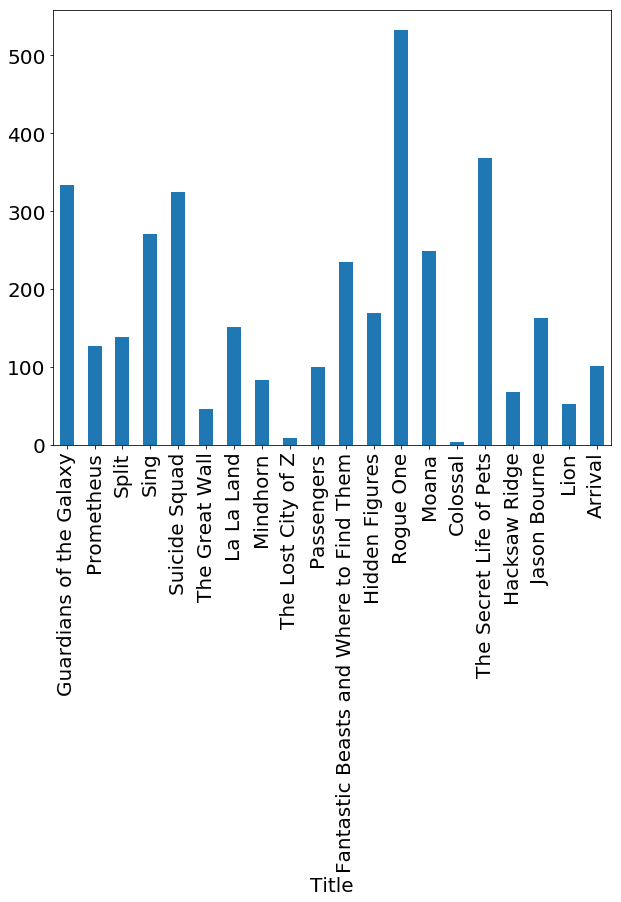

In [231]:
# Built-in pandas plot functions

# hard to see movie labels!
# movies.head(10).revenue_millions.plot();

movies.head(20).revenue_millions.plot(kind='bar');




In [139]:
# Pandas integrates nicely with the graphing library Matplotlib, 
# so we can make graphs directly off our DataFrames and Series

# TIPS:
# for 'categorical' variables use Bar Charts and Boxplots
# for continuous/numerical variables use Histograms, Scatterplots, Line graphs, Boxplots

# First import it:
import matplotlib.pyplot as plot

# make graphs appear in our notebook!
%matplotlib inline 

# Next, set some default sizes for fonts and images:
plot.rcParams.update({
    'font.size': 20,
    'figure.figsize': (10, 8)
})


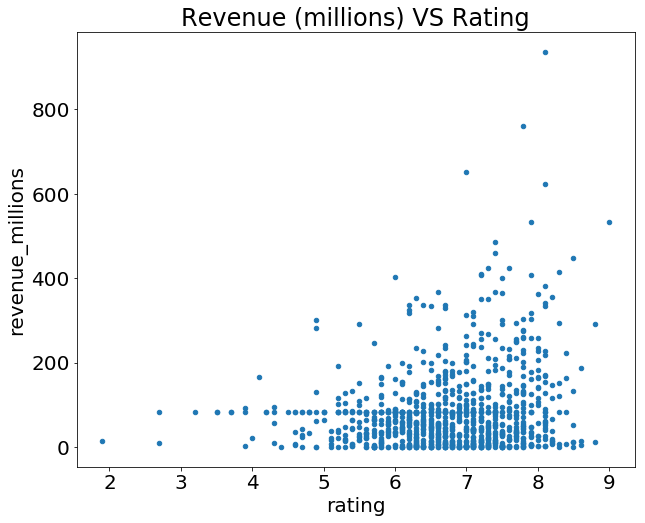

In [230]:
# Let's plot the relationship between ratings and revenue!
# we just need to call plot() on our dataframe, with some arguments describing
# how to construct the plot, such as which columns to use for the X and Y axes of the plot:


# movies_cleaned = movies[ movies['revenue_millions'] < 400 ]

movies.plot(
  kind='scatter',
  x='rating',
  y='revenue_millions',
  title='Revenue (millions) VS Rating'
)

# no visuals unless we add '%matplotlib inline'

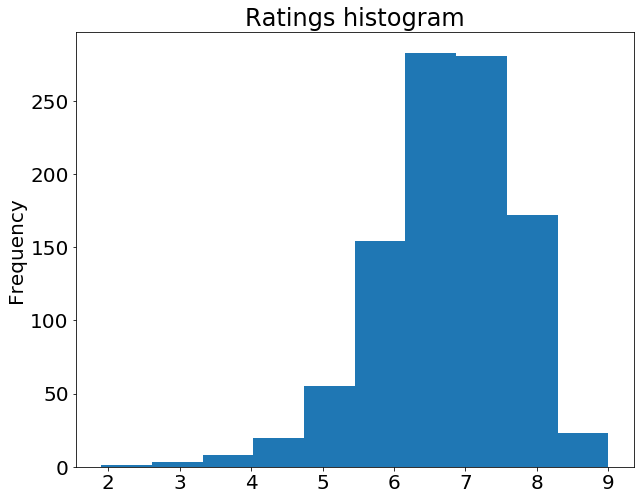

In [144]:
# One of the most useful plots is a histogram, which lets
# us see the distribution of values for a single column

# Let's see how the ratings of movies are grouped or spread out across our dataset:
movies['rating'].plot(kind='hist', title='Ratings histogram')


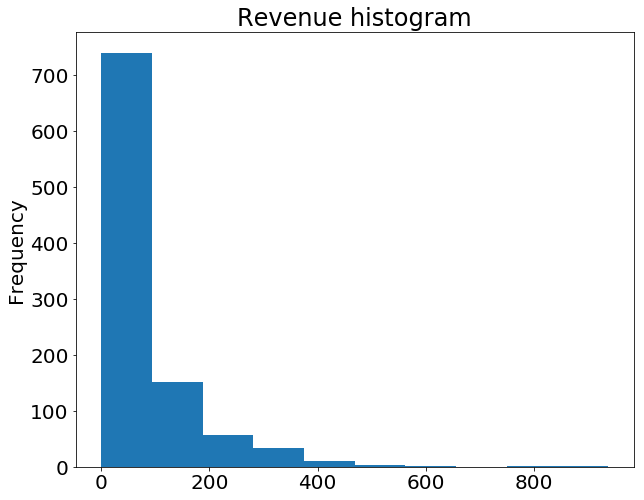

In [166]:
# What about the revenue?
movies['revenue_millions'].plot(kind='hist', title='Revenue histogram');


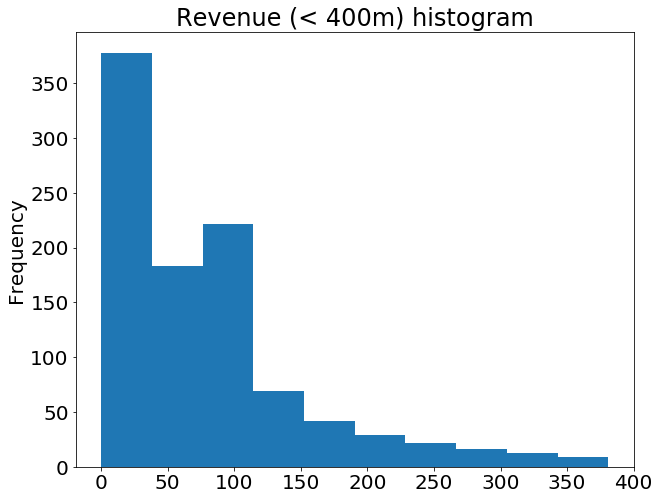

In [160]:

# how to zoom in, and ignore the outliers with more than 400mil?
# First, how many of them are there?

movies_zoomed = movies[ movies.revenue_millions < 400 ]

movies_zoomed['revenue_millions'].plot(kind='hist', title='Revenue (<400m) histogram')

# WHAT IF WE WANT TO SEE BOTH ON THE SAME IMAGE? 
# Just put them in the same cell (only works for some plots, of same kind

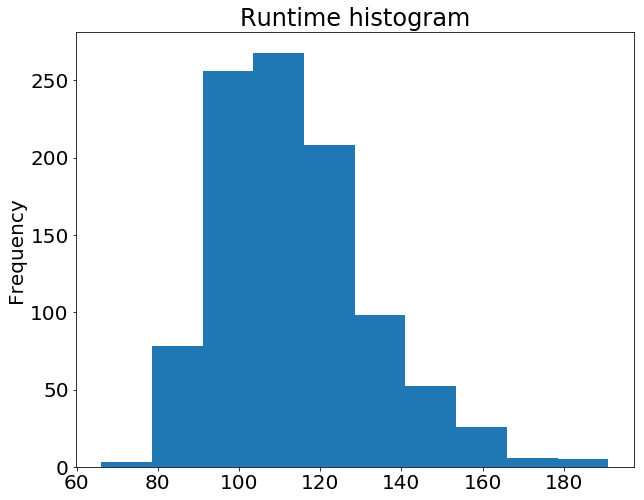

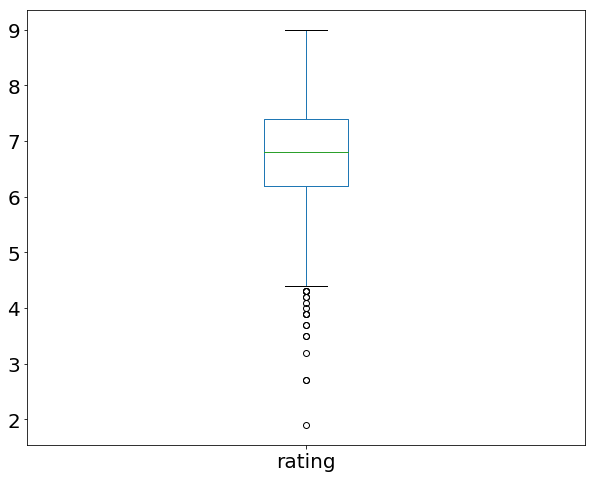

In [176]:
# Remember .describe() from earlier on, that gives us a table of statistical data?
movies['rating'].describe()

# We can visualise this data using a Boxplot
movies['rating'].plot(kind='box')

### Key to the Boxplot format
![key to plot](https://i1.wp.com/flowingdata.com/wp-content/uploads/2008/02/box-plot-explained.gif)

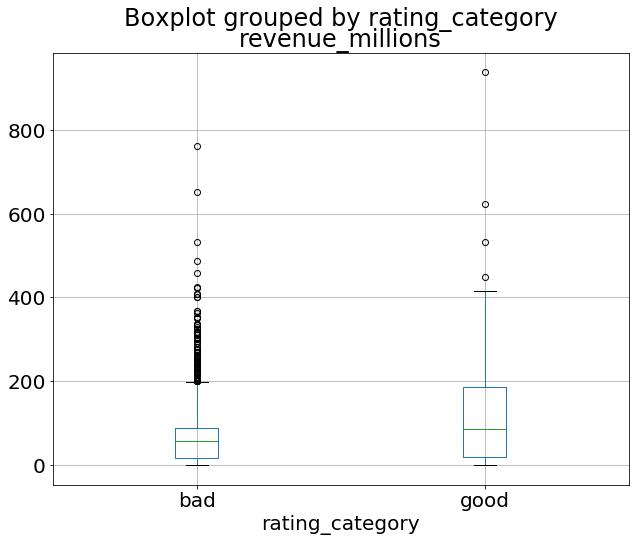

In [182]:
# We can combine categorical data (a few values, non-numeric) with continuous data (numerical, over a wide range)
# to see revenue grouped by our rating category:
movies.boxplot(
  column='revenue_millions',
  by='rating_category' # group by
)

# Try by year! ... don't use a column with many values!

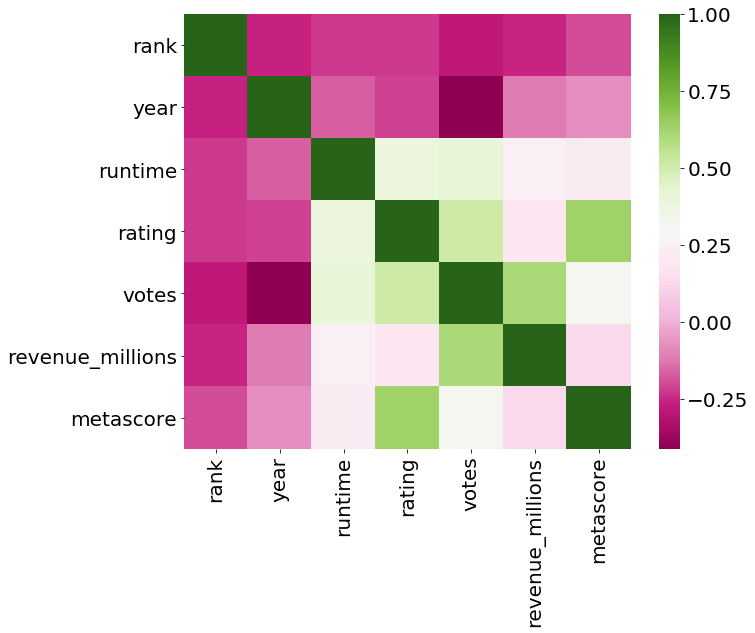

In [193]:
# Remember the correlation grid from above? We can visualise that too
# using colours to find the strongest correlations

# For this, however, we need another package: seaborn

import seaborn

corr = movies.corr()

# graph correlation matrix
seaborn.heatmap(
  corr, # ax=ax,
  xticklabels=corr.columns.values,
  yticklabels=corr.columns.values,
  # cmap='PiYG'  # 'coolwarm'
)

In [196]:
movies.year.unique()

In [197]:
sorted(movies.year.unique())

[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

In [210]:
movies[ movies.year == 2006 ]['rating'].mean()

7.1250000000000009

In [204]:
movies[ movies.year == 2016 ]['rating'].mean()

6.436700336700337